Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 331s 8s/step - accuracy: 0.7287 - loss: 0.5775 - val_accuracy: 0.6250 - val_loss: 0.7670
Epoch 2/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 334s 7s/step - accuracy: 0.8056 - loss: 0.4063 - val_accuracy: 0.7532 - val_loss: 0.5586
Epoch 3/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 234s 6s/step - accuracy: 0.8499 - loss: 0.3326 - val_accuracy: 0.7821 - val_loss: 0.4630
Epoch 4/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 235s 6s/step - accuracy: 0.8631 - loss: 0.3112 - val_accuracy: 0.8381 - val_loss: 0.3785
Epoch 5/5
41/41 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.8696 - loss: 0.2923 - val_accuracy: 0.8237 - val_loss: 0.3982


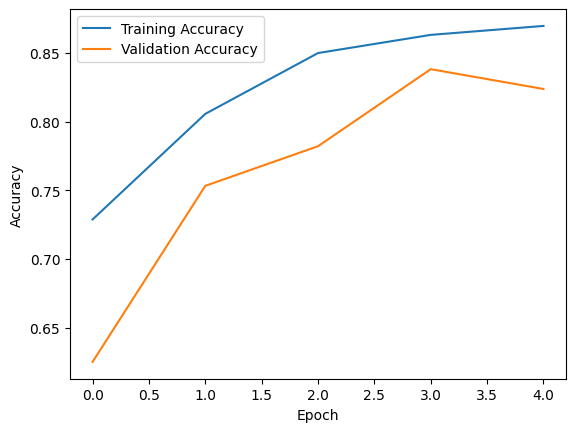

5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step


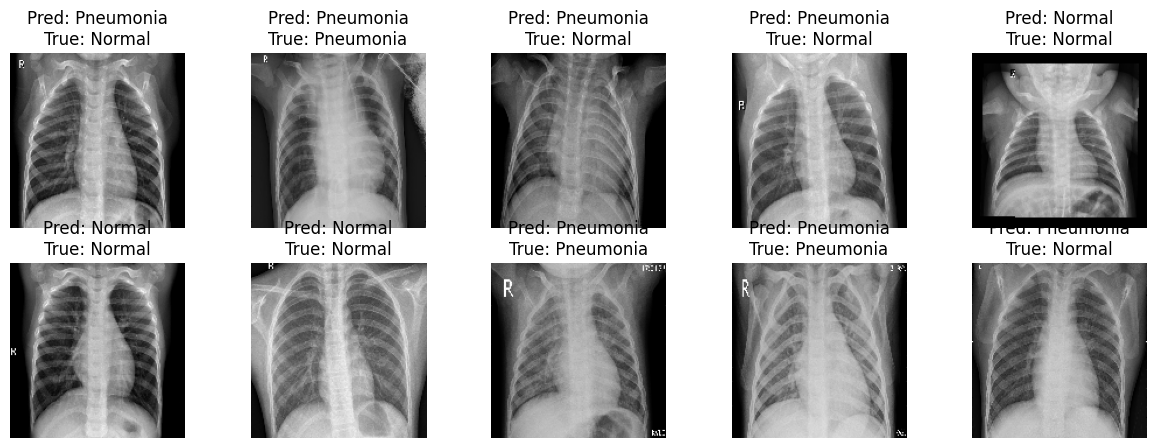

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D

train_dir = r"C:\Users\HP\Downloads\Xray\train"
test_dir = r"C:\Users\HP\Downloads\Xray\test"

train_datagen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.2,
    height_shift_range=0.2
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=128, class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir, target_size=(150,150), batch_size=128, class_mode='binary'
)

# ✅ Build Model
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Correct training call (no wrong steps_per_epoch)
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=test_gen
)
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'],label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
predictions = model.predict(test_gen)
import matplotlib.pyplot as plt
import numpy as np

# Function to display predictions on 10 test samples
def display_10_sample_predictions(model, test_generator, class_names):
    # Reset the generator to start from the beginning
    test_generator.reset()
    
    # Get a batch of images and labels
    x_test, y_true = next(test_gen)
    y_pred = model.predict(x_test[:10])  # Predict on the first 10 samples
    y_pred_labels = (y_pred > 0.5).astype(int).reshape(-1)  # Convert to binary labels if needed

    # Plot the 10 samples with predictions
    plt.figure(figsize=(15, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(x_test[i])
        true_label = class_names[int(y_true[i])]
        pred_label = class_names[y_pred_labels[i]]
        plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
        plt.axis('off')
    plt.show()

# Example usage
class_names = ['Normal', 'Pneumonia']  # Adjust based on your class labels
display_10_sample_predictions(model, test_gen, class_names)